In [22]:
import sympy as sp
import numpy as np

s = sp.symbols('s ', complex=True)

root_1 = sp.Rational(1,2)
root_2 = 2
root_3 =  3

Q = (s+1)*(s**2+s+1)

D = (s+root_1)*(s+root_2)*(s+root_3)

H =(Q/D)

display("H:")
display(H)

display("Descomposición en fracciones simples de H:")
display(sp.apart(H))

residue_1 = (H*(s+root_1)).subs(s,-root_1)
residue_2 = (H*(s+root_2)).subs(s,-root_2)
residue_3 = (H*(s+root_3)).subs(s,-root_3)
residue_4 = sp.apart(H).subs(s,np.inf) # En infinito

z22 = residue_1/(s+root_1) + 1 +  residue_2/(s+root_2)
z11 =  -residue_3/(s+root_3)

display("Z11B:")
display(sp.expand(z11))

display("Z22A:")
display(sp.expand(z22))

'H:'

(s + 1)*(s**2 + s + 1)/((s + 1/2)*(s + 2)*(s + 3))

'Descomposición en fracciones simples de H:'

1 + 1/(5*(2*s + 1)) - 28/(5*(s + 3)) + 2/(s + 2)

'Z11B:'

28/(5*s + 15)

'Z22A:'

1 + 1/(10*s + 5) + 2/(s + 2)

<IPython.core.display.Math object>

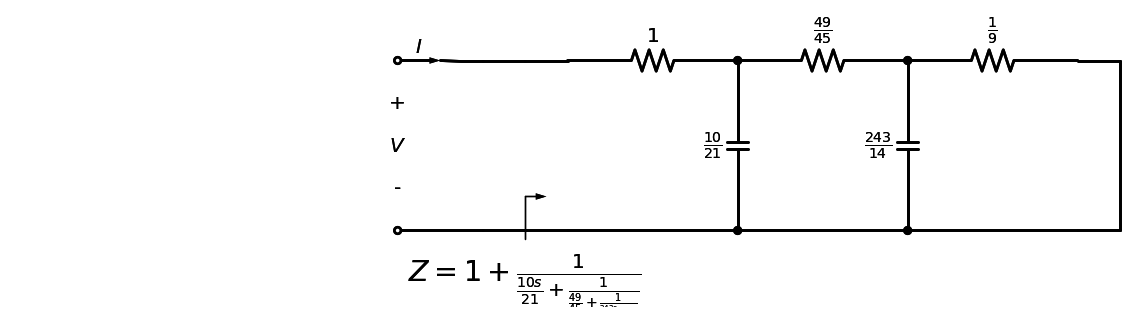

In [23]:
import sympy as sp
import splane as tc2


# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
Imm = z22

# Implementaremos Imm mediante Cauer 1 o remociones continuas en infinito
koo, imm_cauer_oo, rem = tc2.cauer_RC(Imm, remover_en_inf=True)

if rem.is_zero:
    
    tc2.print_latex( r'$' + sp.latex(Imm) + r'=' + sp.latex(imm_cauer_oo) + r'$' )

    # Tratamos a nuestra función inmitancia como una Z
    tc2.dibujar_cauer_RC_RL(koo, z_exc = imm_cauer_oo)




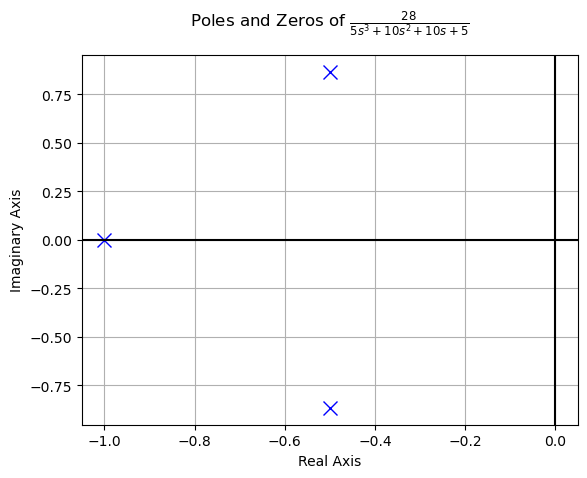

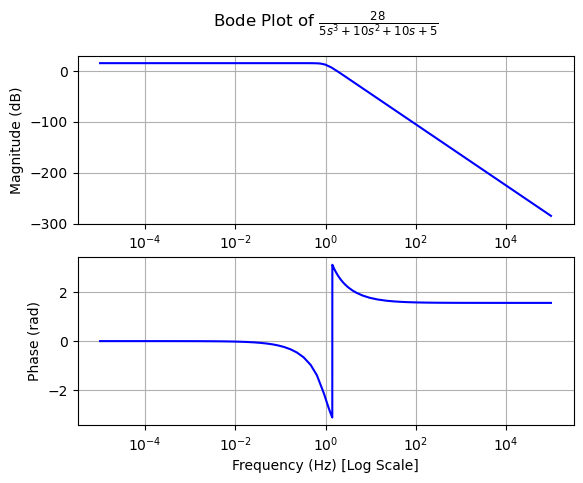

In [27]:
from sympy import symbols, cancel, pprint, latex
from sympy import MatrixSymbol, Matrix

from sympy.solvers.solveset import linsolve
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot

s = symbols('s')
r1,r2,r3,r4 = symbols('r1 r2 r3 r4')
c1,c2,c3 = symbols('c1 c2 c3')

r1_val = sp.Rational(1,9)
r2_val = sp.Rational(49,45)
r3_val = sp.Rational(1,1)
r4_val = sp.Rational(28,15)
c1_val = sp.Rational(243,14)
c2_val = sp.Rational(10,21)
c3_val = sp.Rational(5,28)

z11 = Matrix([[r1+1/(s*c1),1/(s*c1)], [1/(s*c1),1/(s*c1)]])
z12 = Matrix([[r2+1/(s*c2),1/(s*c2)], [1/(s*c2),r3+1/(s*c2)]])

z1 = z11 + z12


a11 = tc2.Z2T_s(z11)
a12 = tc2.Z2T_s(z12)

r4_c3 = 1/(1/r4+s*c3)

z3 = Matrix([[r4_c3,r4_c3], [r4_c3,r4_c3]])
  
A1 = tc2.Z2T_s(z1)
A1 = a11*a12
A2 =  Matrix([[-1,0], [0,1]])
A3 =  tc2.Z2T_s(z3)

A = A1 * A2 * A3

Z = tc2.T2Z_s(A)

#Z = Z.subs({r1:sp.Rational(7,33), r2: sp.Rational(16,11), r3: 1, r4: 2, c1:sp.Rational(121,14) , c2:sp.Rational(1,2) , c3:sp.Rational(1,4) })
Z = Z.subs({r1:r1_val, r2:r2_val, r3: r3_val, r4: r4_val, c1: c1_val , c2:c2_val , c3:c3_val  })
A = A.subs({r1:r1_val, r2:r2_val, r3: r3_val, r4: r4_val, c1: c1_val , c2:c2_val , c3:c3_val  })

n,d = sp.fraction(sp.simplify(1/A[0,0]))
TF = TransferFunction(n,d,s)
pole_zero_plot(TF)
bode_plot(TF)
